In [1]:
import numpy as np
import pandas as pd

In [3]:
enem_sp = pd.read_csv('/content/drive/MyDrive/Cursos UDEMY/Curso Estatistica com Python/arquivos1/enem_2019_tratado.csv', sep=',', encoding='iso-8859-1')

In [4]:
#procurando por uma escola especifica
colegiox = enem_sp.loc[enem_sp['CO_ESCOLA'] == 35017632.0]
colegiox.shape #tamanho do resgistro

(41, 28)

In [5]:
colegiox.head()

,NU_INSCRICAO,NO_MUNICIPIO_RESIDENCIA,IDADE,SEXO,TP_ESTADO_CIVIL,RACA,TP_NACIONALIDADE,TP_ST_CONCLUSAO,ESCOLA,CO_ESCOLA,...,NOTA_MT,TP_LINGUA,TP_STATUS_REDACAO,COMP1,COMP2,COMP3,COMP4,COMP5,NOTA_REDACAO,INTERNET
37,"1,90E+11",Águas de Lindóia,18,M,1,branca,1,2,pública,35017632.0,...,537.1,Inglês,1.0,120.0,40.0,40.0,120.0,20.0,340.0,Sim
44,"1,90E+11",Águas de Lindóia,17,F,1,parda,1,2,pública,35017632.0,...,451.9,Inglês,1.0,140.0,120.0,140.0,160.0,160.0,720.0,Não
52,"1,90E+11",Águas de Lindóia,17,F,1,branca,1,2,pública,35017632.0,...,506.4,Espanhol,1.0,120.0,120.0,120.0,120.0,80.0,560.0,Não
65,"1,90E+11",Águas de Lindóia,17,M,1,parda,1,2,pública,35017632.0,...,59.5,Inglês,1.0,120.0,120.0,120.0,120.0,40.0,520.0,Sim
79,"1,90E+11",Águas de Lindóia,18,F,1,branca,1,2,pública,35017632.0,...,510.6,Espanhol,1.0,120.0,120.0,120.0,140.0,140.0,640.0,Sim


Analise das classificação das variáveis

In [6]:
colegiox.dtypes

,0
NU_INSCRICAO,object
NO_MUNICIPIO_RESIDENCIA,object
IDADE,int64
SEXO,object
TP_ESTADO_CIVIL,int64
RACA,object
TP_NACIONALIDADE,int64
TP_ST_CONCLUSAO,int64
ESCOLA,object
CO_ESCOLA,float64


Analisar valores missing ou se háa valores ausentes

In [7]:
colegiox.isnull().sum()

,0
NU_INSCRICAO,0
NO_MUNICIPIO_RESIDENCIA,0
IDADE,0
SEXO,0
TP_ESTADO_CIVIL,0
RACA,0
TP_NACIONALIDADE,0
TP_ST_CONCLUSAO,0
ESCOLA,0
CO_ESCOLA,0


Analise de outliers

In [8]:
import plotly.express as px

In [10]:
grafico = px.box(colegiox, y="NOTA_REDACAO")
grafico.show()

Analisar Normalidade

In [11]:
import seaborn as sns

<Axes: xlabel='NOTA_REDACAO', ylabel='Probability'>

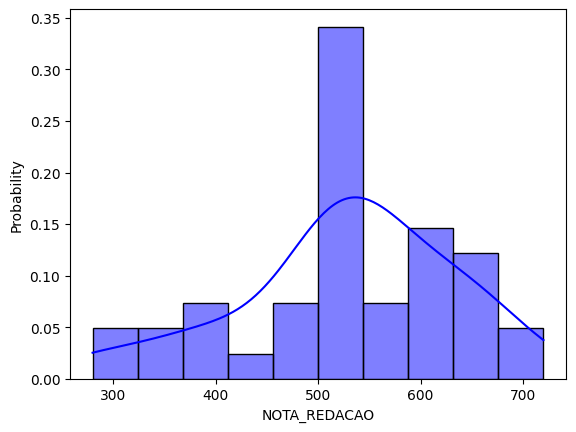

In [12]:
sns.histplot(colegiox, x='NOTA_REDACAO', bins=10, color='blue', kde=True, stat='probability')

In [13]:
import scipy.stats as stats
import matplotlib.pyplot as plt

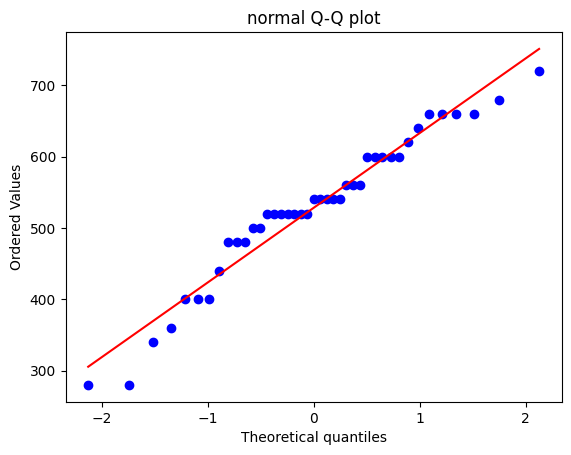

In [14]:
#grafico indica que os dados tende a normalidade
stats.probplot(colegiox['NOTA_REDACAO'], dist='norm', plot=plt)
plt.title('normal Q-Q plot')
plt.show()

CRITÉRIOS:

NÍVEL DE SIGNIFICÂNCIA DE 0,05 ou 5% (MAIS UTILIZADO)

QUANDO p > 0,05 (distribuição normal).

In [15]:
#teste shapiro-Wilk
stats.shapiro(colegiox.NOTA_REDACAO)

ShapiroResult(statistic=np.float64(0.9529763299532606), pvalue=np.float64(0.08905532208084765))

In [16]:
import statsmodels
from statsmodels.stats.diagnostic import lilliefors

In [17]:
# Teste Lilliefors (Kolmogorov_Sminorv)
statsmodels.stats.diagnostic.lilliefors(colegiox['NOTA_REDACAO'], dist='norm')

(np.float64(0.15115505856545197), np.float64(0.020310301942343047))

In [18]:
# Teste Anderson-Darling
stats.anderson(colegiox.NOTA_REDACAO, 'norm')

AndersonResult(statistic=np.float64(0.698461623735156), critical_values=array([0.532, 0.606, 0.727, 0.848, 1.009]), significance_level=array([15. , 10. ,  5. ,  2.5,  1. ]), fit_result=  params: FitParams(loc=np.float64(528.2926829268292), scale=np.float64(104.01688418291499))
 success: True
 message: '`anderson` successfully fit the distribution to the data.')

# TESTE Z

Média das notas do colégio X, comparada a média do Estado de São Paulo.

Ho = média é igual a de São Paulo : p > 0.05

Ha = média é diferente da de São Paulo : p <= 0.05

In [22]:
from statsmodels.stats.weightstats import ztest

In [19]:
enem_sp.NOTA_REDACAO.describe()

,NOTA_REDACAO
count,499940.000000
mean,593.018322
std,170.536724
min,0.000000
25%,500.000000
50%,600.000000
75%,680.000000
max,1000.000000


In [24]:
stats, p = ztest(colegiox['NOTA_REDACAO'], value=593.0183221986639)
print('Estatistica de teste: {}'.format(stats.round(2)))
print('P-valor: {}'.format(p))

Estatistica de teste: -3.98
P-valor: 6.764690422432806e-05


In [25]:
colegiox['NOTA_REDACAO'].describe()

,NOTA_REDACAO
count,41.000000
mean,528.292683
std,104.016884
min,280.000000
25%,480.000000
50%,540.000000
75%,600.000000
max,720.000000


**INTERPRETAÇÃO:**

Teste estatístico: z = -3,93

p_valor = 6.76e-05

Conclusão: Estatisticamente, a média do colégio x é diferente da média do Estado de São Paulo, com intervalo de confiança de 95%.